# TypiClust WalkThroughs 
This notebook will be briefly demonstrating how the Typiclust and TypiclustPlus classes work and aid in sampling. All notebooks are seeded for reproducability. 

Run [Imports](#imports) and [Variables & Setup](#variables-&-setup) before running [Typiclust Sampling](#typiclust-sampling) and/or [TypiclustPlus Sampling](#typiclustplus-sampling).

## Imports 

In [2]:
import torchvision 
import torch 
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt 
import random

from typiclust import Typiclust
from typiclustPlus import TypiclustPlus

random.seed(42)
torch.cuda.is_available()

True

## Variables & Setup

In [3]:
# Sampling size and L0 indices 
budget_size = 10
l_set_indices = [] 

# Define CIFAR-10 data transforms with augmentations
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    ]) 

feat_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

In [4]:
# CIFAR10 training dataset
train_ds = torchvision.datasets.CIFAR10(root='./datasets', 
                                       train=True, 
                                       download=True, 
                                       transform=train_transform
                                       )
# Training dataset for feature representational learning (transformations differ)
feat_ds = torchvision.datasets.CIFAR10(root='./datasets', 
                                       train=True, 
                                       download=True, 
                                       transform=feat_transform)
# Training dataset loader 
train_loader = torch.utils.data.DataLoader(
            train_ds, batch_size=10, shuffle=False,
            num_workers=0, pin_memory=True, drop_last=False)

# Dataset loader for feature representational learning 
feat_loader = torch.utils.data.DataLoader(
    feat_ds, batch_size=10, shuffle=False,
    num_workers=0, pin_memory=True, drop_last=False
)

In [5]:
def show_samples(l_set_indices):
    # Define the labels of the dataset
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
            'dog', 'frog', 'horse', 'ship', 'truck']

    # Define grid dimensions 
    W_grid = 5
    L_grid = 2

    fig, axes = plt.subplots(L_grid, W_grid, 
                            figsize = (W_grid, L_grid))

    axes = axes.ravel()

    for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
        # read and display an image with the selected index    
        img, label = train_ds[l_set_indices[i]]
        
        axes[i].imshow(img.T.rot90(-1))
        label_index = int(label)
        axes[i].set_title(labels[label_index], fontsize = 8)
        axes[i].axis('off')

    plt.subplots_adjust(hspace=0.4)

# Typiclust Sampling

This also demonstrates it's ability for initial pooling. An interesting thing of note is that it has a good ability of sampling nearly all classes initially except for the 'ship' class. However, this differs from sample to sample. In past experiments and samples, it could be noted that horse tend to be really over sampled. 

In [ ]:
tpc = Typiclust(train_ds,
                feat_loader,
                budget_size,
                l_set_indices)

# Call Typiclust.sample(l_set_indices) to sample again
l_set, l_set_indices= tpc.sample(l_set_indices)

Loaded features in locally


C:\Users\ROG\AppData\Local\Temp\ipykernel_41332\87562853.py:19: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3729.)
  axes[i].imshow(img.T.rot90(-1))


[36361, 44967, 28697, 41614, 48689, 31572, 5666, 28221, 44626, 2102]


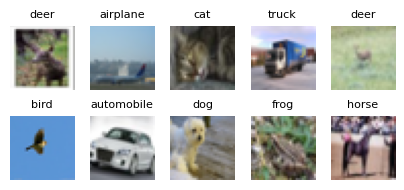

In [ ]:
show_samples(l_set_indices)
print(l_set_indices)

# TypiclustPlus Sampling 

Compared to Typiclust it managed to sample the 'deer' class. However, it did not sample the 'ship' class. 

In [ ]:
l_set_indices = []

tpc = TypiclustPlus(train_ds,
                feat_loader,
                budget_size,
                l_set_indices)

# Call Typiclust.sample(l_set_indices) to sample again
l_set, l_set_indices= tpc.sample(l_set_indices)

Loaded features in locally
Loaded typiclustplus_cifar10_budget_10.npy locally...


[38604, 36281, 26075, 13534, 19334, 8133, 30564, 48308, 8304, 4410]


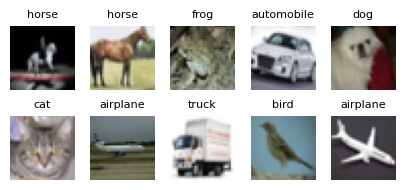

In [ ]:
show_samples(l_set_indices)
print(l_set_indices)